### Лабораторная работа №3

Выполните классическое и рандомизированное сингулярное разложение одной из цветовых компонент приложенного изображения.
Какое число сингулярных значений требуется для достаточно качественного восстановления изображения?
Как различается время расчета для этих двух видов разложения на вашем компьютере?

### Классическое SVD

Размер исходной матрицы:       (498, 444)
Вызов функции SVD-разложения
Wall time: 35.9 ms

Размеры матриц SVD:            (498, 498) (444,) (444, 444)
Размеры "урезанных" матриц SVD: (498, 380) (380, 380) (380, 444)


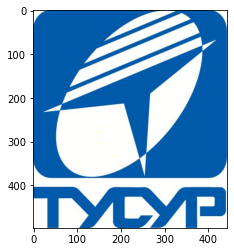

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# выделение компонент изображения
A = imread('tusur.bmp')
# img = plt.imshow(A)

R=A[:,:,0]
G=A[:,:,1]
B=A[:,:,2]

print("Размер исходной матрицы:".ljust(30), B.shape)

#классическое сингулярное разложение
print("Вызов функции SVD-разложения")
%time U, S, V = np.linalg.svd(B, full_matrices=True) # full SVD
print()
print("Размеры матриц SVD:".ljust(30), U.shape, S.shape, V.shape)

# урезаем все матрицы до заданного числа элементов диагональной матрицы S
r = 380 
U1 = U[:,:r]
S1 = S[:r]
V1 = V[:r,:]

S1=np.diag(S1)

print('Размеры "урезанных" матриц SVD:'.ljust(30), U1.shape, S1.shape, V1.shape)

Bm = U1.dot(S1.dot(V1))
Bm = Bm.astype(int)

# ограничиваем диапазон, чтобы не ругался при выводе картинки
i = Bm>=0
Bm = Bm*i
i = Bm<=255
Bm = Bm*i

# собираем RGB-изображение после преобразования одного канала
R=R.reshape(-1,1)
G=G.reshape(-1,1)
Bm=Bm.reshape(-1,1)
# print(R.shape, G.shape, B.shape)

X=np.concatenate((R,G,Bm), axis=1)
X=X.reshape(498,444,3)
img = plt.imshow(X)


### Рандомизированное SVD

Вызов функции рандомизированного SVD-разложения
Wall time: 66.8 ms

Размеры матриц SVD:            (498, 380) (380,) (380, 444)


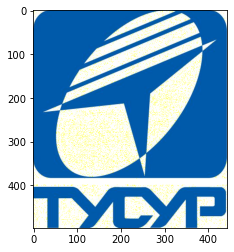

In [136]:
#случайная матрица заданного размера:
rank = 380

def rsvd(A, rank): # в функцию передаётся матрица и размер матрицы случайных чисел

    Om = np.random.randn(A.shape[1],rank)
    # QR-разложение Y
    Y= A.dot(Om)
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
#     print('Размеры "сжатой" матрицы:'.ljust(30), B.shape)

    U_B, S, V = np.linalg.svd(B, full_matrices=False)
    U = Q @ U_B
    return U, S, V

print("Вызов функции рандомизированного SVD-разложения")    
%time U, S, V = rsvd(B,rank)
print()
print("Размеры матриц SVD:".ljust(30), U.shape, S.shape, V.shape)
    
Bm = U @ np.diag(S) @ V
Bm = Bm.astype(int)

# ограничиваем диапазон, чтобы не ругался при выводе картинки
i = Bm>=0
Bm = Bm*i
i = Bm<=255
Bm = Bm*i

# собираем RGB-изображение после преобразования одного канала
R=R.reshape(-1,1)
G=G.reshape(-1,1)
Bm=Bm.reshape(-1,1)

X=np.concatenate((R,G,Bm), axis=1)
X=X.reshape(498,444,3)
img = plt.imshow(X)




### Вывод
Сравнивать время исполнения стандартного SVD и рандомизированного в моём случае точно смысла не имеет: как минимум, вызов стандартного SVD нужно было тоже обернуть в функцию. Однако, по качеству восстановленного изображения рандомизированное SVD проигрывает стандартному при одинаковых размерах матрицы сингулярных значений.